# **Analyzing Vodafone Age dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (7, 5)
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/ML Final Project/Datasets/vodafone_age_subset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Columns: 116 entries, CALCULATION_METHOD_ID to target
dtypes: float64(97), int64(5), object(14)
memory usage: 18.6+ MB


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None,'display.max_colwidth', -1):
    display(df.head(10))

,CALCULATION_METHOD_ID,calls_count_in_weekdays,calls_duration_in_weekdays,calls_count_out_weekdays,calls_duration_out_weekdays,calls_count_in_weekends,calls_duration_in_weekends,calls_count_out_weekends,calls_duration_out_weekends,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,LAT_HOME,LON_HOME,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,lat_quad_home,lon_quad_home,LAT_WORK,LON_WORK,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,lat_quad_work,lon_quad_work,device_brand,device_model,software_os_vendor,software_os_name,software_os_version,device_type_rus,sim_count,AVG_ARPU,ROUM,phone_value,SCORING,car,gender,lifetime,how_long_same_model,ecommerce_score,PRIVAT,OSCHADBANK,ALFABANK,UKRSOTBANK,OTP,UKRGASBANK,RAIFFEISEN,PIVDENNYI,IDEABANK,SBERBANK,MONOBANK,PRAVEXBANK,UKRSIB,banks_sms_count,SHELL,OKKO,SUNOIL,KLO,BRSM,AMIC,TNK,UPG,gas_stations_sms,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,dropbox_volume,dropbox_count,uber_volume,uber_count,steam_volume,steam_count,whatsapp_volume,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,twitch_volume,twitch_count,tumblr_volume,tumblr_count,flickr_volume,flickr_count,badoo_volume,badoo_count,tinder_volume,tinder_count,netflix_volume,netflix_count,applemaps_volume,applemaps_count,msoffice365_volume,msoffice365_count,jabber_volume,jabber_count,telegram_volume,telegram_count,user_hash,target
0,2,10.87,32.025,17.74,40.819,7.00,21.463,11.13,20.427,154.837,181.143,46.439609,30.639673,Одеська,Овідіопольський,Авангард,46.438235,30.641922,46.444676,30.657115,Одеська,Одеса,Одеса,46.442733,30.655670,Samsung,SM-J700H DS,Google,Android,5.1,smartphone,2.0,260.739450,0.0,3.0,HIGH_MEDIUM,1,0,38.700000,25.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6714,492.55,0.3104,2.42,2.2472,97.26,17.6650,208.84,11.6511,479.45,0.5341,60.84,0.1087,13.71,1.1130,12.26,0.0,0.0,0.0,0.0,0.0012,0.03,5.1200,82.42,0.1076,0.26,0.0,0.0,0.0009,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.09,9.29,0.0000,0.0,0.0,0.0,312ca09052ac6eb49fbd2a546a782df5,4
1,1,0.91,1.346,0.48,0.546,0.25,0.688,0.75,0.708,53.639,49.009,46.535878,30.728390,Одеська,Одеса,Одеса,46.537188,30.729834,46.406118,30.715685,Одеська,Одеса,Одеса,46.406747,30.714810,Blackview,BV2000,Google,Android,0,smartphone,2.0,52.635025,0.0,3.0,LOW,1,0,159.533333,10.0,0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0795,17.03,0.0000,0.00,0.1209,14.81,1.9411,13.13,2.6901,112.48,0.0085,0.68,0.0000,0.00,0.0021,0.10,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0033,0.1,0.0,0.0,327733ea2cea082b48707d2700b49327,4
2,2,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.000,48.456286,35.059533,Дніпропетровська,Дніпро,Дніпро,48.457353,35.060106,48.456286,35.059533,Дніпропетровська,Дніпро,Дніпро,48.457353,35.060106,Samsung,E1282T,0,0,0,phone,2.0,22.189575,0.0,4.0,VERY LOW,0,1,177.900000,25.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0000,0.0,0.0,0.0,22ede60385359c8c24bc68449ca56763,6
3,2,7.39,30.278,11.00,44.182,5.00,20.008,8.38,32.385,0.000,0.000,48.600532,35.668434,Дніпропетровська,Павлоградський,Булахівка,48.601219,35.667443,48.557956,35.766095,Дніпропетровська,Павлоградський,Межеріч,48.560749,35.764687,Nokia,107,Nokia,30,0,phone,2.0,41.816525,0.0,4.0,VERY LOW,0,1,85.633333,25.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



---


# **1. Data understanding**
### **Goal:** predict age group of the customer
### **Target feature**: a value between 1 and 6, which corresponds to a specific age group <br> (named as "target" in the dataset)

## **Distribution of the target feature**

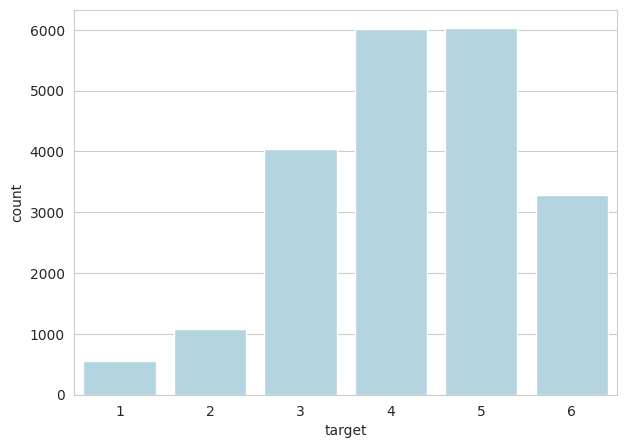

In [ ]:
sns.countplot(df, x="target", color="lightblue")
plt.show()

In [ ]:
target_values = df["target"].value_counts().sort_index()
target_values

1     548
2    1076
3    4047
4    6020
5    6029
6    3280
Name: target, dtype: int64



---


# **2. Data cleaning**

### **Note:** for convenience, we will split original dataset into numeric and non-numeric subsets

## **2.1 Detecting NaN-values and primary cleaning**

#### **To prevent naming problems, let's strip feature names**

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None,'display.max_colwidth', -1):
#     display(pd.DataFrame(df.columns))

#### **Testing for NaN-values**

In [ ]:
print(f"Number of NaN entries: {df.isna().sum().sum()}")

Number of NaN entries: 0


## **2.2 Categorical data cleaning**

### **a. Identifying categorical features**

In [ ]:
non_numeric = df.select_dtypes(exclude='number')
non_numeric_columns = non_numeric.columns

for feature in non_numeric_columns:
  print(f"{non_numeric[feature].dtype}\t - {feature}")

object	 - Oblast_post_HOME
object	 - Raion_post_HOME
object	 - City_post_HOME
object	 - Oblast_post_WORK
object	 - Raion_post_WORK
object	 - City_post_WORK
object	 - device_brand
object	 - device_model
object	 - software_os_vendor
object	 - software_os_name
object	 - software_os_version
object	 - device_type_rus
object	 - SCORING
object	 - user_hash


### **b. Data exploration**

In [ ]:
non_numeric.head(15)

,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,device_brand,device_model,software_os_vendor,software_os_name,software_os_version,device_type_rus,SCORING,user_hash
0,Одеська,Овідіопольський,Авангард,Одеська,Одеса,Одеса,Samsung,SM-J700H DS,Google,Android,5.1,smartphone,HIGH_MEDIUM,312ca09052ac6eb49fbd2a546a782df5
1,Одеська,Одеса,Одеса,Одеська,Одеса,Одеса,Blackview,BV2000,Google,Android,0,smartphone,LOW,327733ea2cea082b48707d2700b49327
2,Дніпропетровська,Дніпро,Дніпро,Дніпропетровська,Дніпро,Дніпро,Samsung,E1282T,0,0,0,phone,VERY LOW,22ede60385359c8c24bc68449ca56763
3,Дніпропетровська,Павлоградський,Булахівка,Дніпропетровська,Павлоградський,Межеріч,Nokia,107,Nokia,30,0,phone,VERY LOW,67682b3b1d1319a7cf90ed80eb16b899
4,Луганська,Хрустальний,Хрустальний,Луганська,Хрустальний,Хрустальний,Alcatel,One Touch 5025D,Google,Android,5.1,smartphone,LOW,334e5ceddcc4f11f261322832526ae49
5,Харківська,Харків,Харків,Харківська,Харків,Харків,Meizu,M5 Note,Google,Android,6.0,smartphone,LOW,8bec6ea776a602b523965f005903cc2e
6,Дніпропетровська,Новомосковський,Новомосковськ,Дніпропетровська,Новомосковський,Новомосковськ,Nokia,301,Nokia,40,1.0,phone,HIGH_MEDIUM,51a16c13cfbae2e7f46b569f1ac8e473
7,Донецька,Донецьк,Донецьк,Донецька,Донецьк,Донецьк,Nokia,C2-03,Nokia,40,0,phone,VERY LOW,e78433ab1b1c6b1263effd87e49bf6b1
8,Волинська,Луцьк,Луцьк,Волинська,Луцьк,Луцьк,Apple,iPhone SE (A1723),Apple,iOS,9.3,smartphone,HIGH,12f35d053b9664e96c624eb44cd5f583
9,0,0,0,0,0,0,Nokia,2330 Classic,Nokia,40,5.1 Lite,phone,VERY LOW,d996ec189cf4f65d7a32fce55292115a


#### Top-10 most frequent entries from each column

In [ ]:
from math import ceil

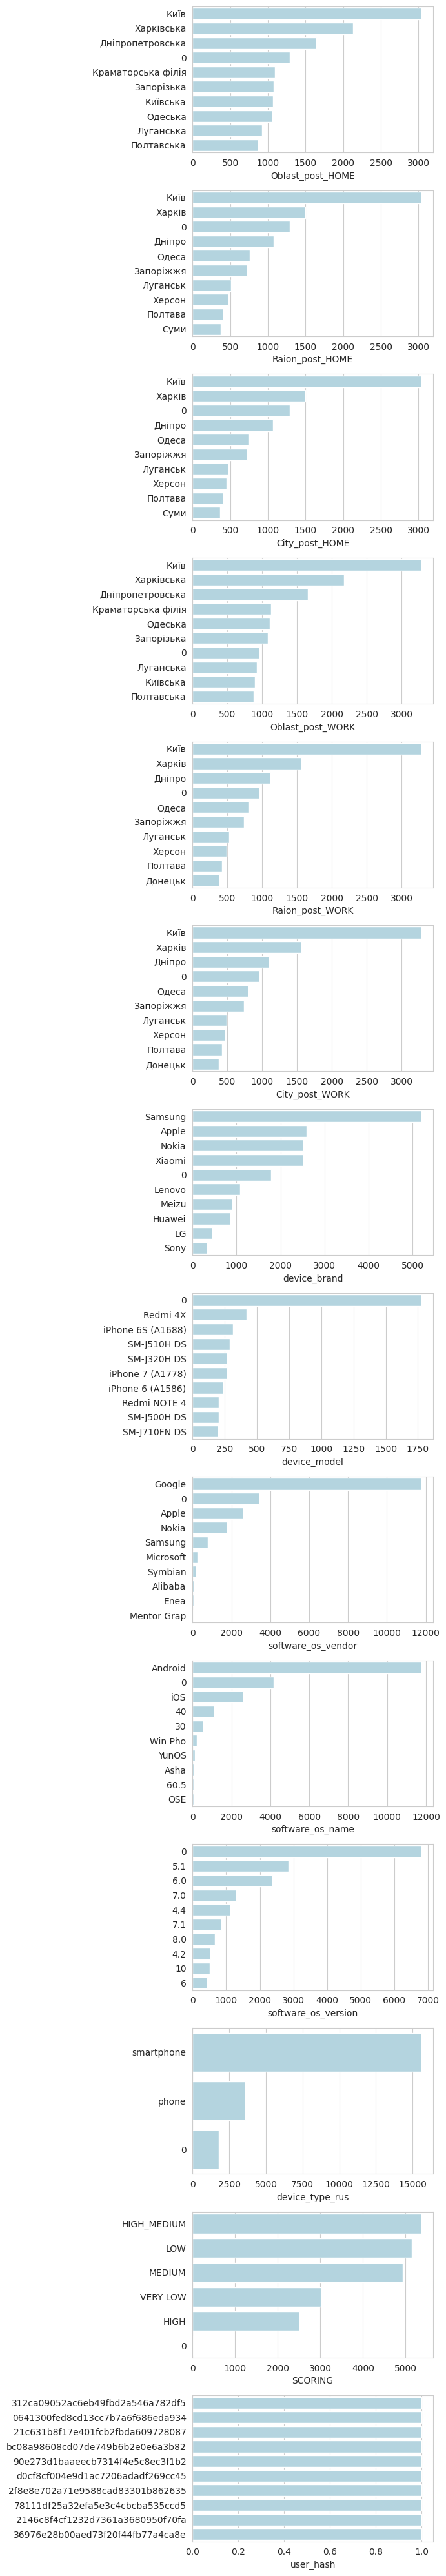

In [ ]:
n = len(non_numeric_columns)
fig, ax = plt.subplots(n, 1, figsize=(7, 40))

j = 0
for col in non_numeric_columns:
  val_count = non_numeric[col].value_counts()[:10]
  sns.barplot(x=val_count, y=val_count.index, orient='h', color="lightblue", ax=ax[j])
  j += 1

plt.tight_layout()
plt.show()

### **c. Rank encoding**
#### **Note:** 1 - lowest salary, 5 - highest salary

In [ ]:
df["SCORING"].value_counts()

HIGH_MEDIUM    5377
LOW            5153
MEDIUM         4928
VERY LOW       3032
HIGH           2506
0                 4
Name: SCORING, dtype: int64

#### Dropping all the entries, where "SCORING" column contains "0"

In [ ]:
mask = (df["SCORING"] == "0")
df = df[~mask]
non_numeric = non_numeric[~mask]

In [ ]:
df["SCORING"].value_counts()

HIGH_MEDIUM    5377
LOW            5153
MEDIUM         4928
VERY LOW       3032
HIGH           2506
Name: SCORING, dtype: int64

In [ ]:
ranking = {
    "VERY LOW": 1,
    "LOW": 2,
    "MEDIUM": 3,
    "HIGH_MEDIUM": 4,
    "HIGH": 5
}

df["SCORING"] = df["SCORING"].map(ranking)

<ipython-input-1121-dea3a3746578>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SCORING"] = df["SCORING"].map(ranking)


In [ ]:
df[non_numeric_columns].head(15)

,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,device_brand,device_model,software_os_vendor,software_os_name,software_os_version,device_type_rus,SCORING,user_hash
0,Одеська,Овідіопольський,Авангард,Одеська,Одеса,Одеса,Samsung,SM-J700H DS,Google,Android,5.1,smartphone,4,312ca09052ac6eb49fbd2a546a782df5
1,Одеська,Одеса,Одеса,Одеська,Одеса,Одеса,Blackview,BV2000,Google,Android,0,smartphone,2,327733ea2cea082b48707d2700b49327
2,Дніпропетровська,Дніпро,Дніпро,Дніпропетровська,Дніпро,Дніпро,Samsung,E1282T,0,0,0,phone,1,22ede60385359c8c24bc68449ca56763
3,Дніпропетровська,Павлоградський,Булахівка,Дніпропетровська,Павлоградський,Межеріч,Nokia,107,Nokia,30,0,phone,1,67682b3b1d1319a7cf90ed80eb16b899
4,Луганська,Хрустальний,Хрустальний,Луганська,Хрустальний,Хрустальний,Alcatel,One Touch 5025D,Google,Android,5.1,smartphone,2,334e5ceddcc4f11f261322832526ae49
5,Харківська,Харків,Харків,Харківська,Харків,Харків,Meizu,M5 Note,Google,Android,6.0,smartphone,2,8bec6ea776a602b523965f005903cc2e
6,Дніпропетровська,Новомосковський,Новомосковськ,Дніпропетровська,Новомосковський,Новомосковськ,Nokia,301,Nokia,40,1.0,phone,4,51a16c13cfbae2e7f46b569f1ac8e473
7,Донецька,Донецьк,Донецьк,Донецька,Донецьк,Донецьк,Nokia,C2-03,Nokia,40,0,phone,1,e78433ab1b1c6b1263effd87e49bf6b1
8,Волинська,Луцьк,Луцьк,Волинська,Луцьк,Луцьк,Apple,iPhone SE (A1723),Apple,iOS,9.3,smartphone,5,12f35d053b9664e96c624eb44cd5f583
9,0,0,0,0,0,0,Nokia,2330 Classic,Nokia,40,5.1 Lite,phone,1,d996ec189cf4f65d7a32fce55292115a


In [ ]:
non_numeric = non_numeric.drop("SCORING", axis=1)

In [ ]:
non_numeric.shape

(20996, 13)

### **d. Cleaning**

#### Deleting non-informative features:
- *user_hash*  (stands for user identifier)
- *software_os_version*
- *software_os_name*
- *device_model*

In [ ]:
columns_to_drop = ["user_hash", "software_os_version", "software_os_name", "device_model"]

non_numeric = non_numeric.drop(columns_to_drop, axis=1)
non_numeric_columns = non_numeric.columns

df = df.drop(columns_to_drop, axis=1)

#### For better readability renaming all "0" entries with "no_info"

In [ ]:
non_numeric = non_numeric.replace({'0': 'no_info'})
df = df.replace({'0': 'no_info'})

In [ ]:
df[non_numeric_columns].head(15)

,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,device_brand,software_os_vendor,device_type_rus
0,Одеська,Овідіопольський,Авангард,Одеська,Одеса,Одеса,Samsung,Google,smartphone
1,Одеська,Одеса,Одеса,Одеська,Одеса,Одеса,Blackview,Google,smartphone
2,Дніпропетровська,Дніпро,Дніпро,Дніпропетровська,Дніпро,Дніпро,Samsung,no_info,phone
3,Дніпропетровська,Павлоградський,Булахівка,Дніпропетровська,Павлоградський,Межеріч,Nokia,Nokia,phone
4,Луганська,Хрустальний,Хрустальний,Луганська,Хрустальний,Хрустальний,Alcatel,Google,smartphone
5,Харківська,Харків,Харків,Харківська,Харків,Харків,Meizu,Google,smartphone
6,Дніпропетровська,Новомосковський,Новомосковськ,Дніпропетровська,Новомосковський,Новомосковськ,Nokia,Nokia,phone
7,Донецька,Донецьк,Донецьк,Донецька,Донецьк,Донецьк,Nokia,Nokia,phone
8,Волинська,Луцьк,Луцьк,Волинська,Луцьк,Луцьк,Apple,Apple,smartphone
9,no_info,no_info,no_info,no_info,no_info,no_info,Nokia,Nokia,phone


#### Let's divide software os vendors into popular and unpopular ones

In [ ]:
software_os_vendor_counts = df["software_os_vendor"].value_counts()
software_os_vendor_counts

Google         11787
no_info         3457
Apple           2596
Nokia           1771
Samsung          770
Microsoft        243
Symbian          174
Alibaba           83
Enea              48
Mentor Grap       27
Blackberry        14
Spreadtrum        12
Mediatek          10
Palm               3
MeeGo              1
Name: software_os_vendor, dtype: int64

In [ ]:
popular_os_vendors = software_os_vendor_counts.index[:6]
unpopular_os_vendors = software_os_vendor_counts.index[6:]
print(popular_os_vendors)
print(unpopular_os_vendors)

Index(['Google', 'no_info', 'Apple', 'Nokia', 'Samsung', 'Microsoft'], dtype='object')
Index(['Symbian', 'Alibaba', 'Enea', 'Mentor Grap', 'Blackberry', 'Spreadtrum',
       'Mediatek', 'Palm', 'MeeGo'],
      dtype='object')


In [ ]:
df["unpopular_os_vendors"] = df["software_os_vendor"].isin(unpopular_os_vendors).astype(int)

In [ ]:
df["unpopular_os_vendors"].value_counts()

0    20624
1      372
Name: unpopular_os_vendors, dtype: int64

#### Manual one-hot encoding for software_os_vendor

In [ ]:
for vendor in popular_os_vendors:
  df[f"software_os_vendor_{vendor}"] = (df["software_os_vendor"] == vendor).astype(int)

In [ ]:
df = df.drop("software_os_vendor", axis=1)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None,'display.max_colwidth', -1):
  display(df.head())

,CALCULATION_METHOD_ID,calls_count_in_weekdays,calls_duration_in_weekdays,calls_count_out_weekdays,calls_duration_out_weekdays,calls_count_in_weekends,calls_duration_in_weekends,calls_count_out_weekends,calls_duration_out_weekends,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,LAT_HOME,LON_HOME,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,lat_quad_home,lon_quad_home,LAT_WORK,LON_WORK,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,lat_quad_work,lon_quad_work,device_brand,device_type_rus,sim_count,AVG_ARPU,ROUM,phone_value,SCORING,car,gender,lifetime,how_long_same_model,ecommerce_score,PRIVAT,OSCHADBANK,ALFABANK,UKRSOTBANK,OTP,UKRGASBANK,RAIFFEISEN,PIVDENNYI,IDEABANK,SBERBANK,MONOBANK,PRAVEXBANK,UKRSIB,banks_sms_count,SHELL,OKKO,SUNOIL,KLO,BRSM,AMIC,TNK,UPG,gas_stations_sms,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,dropbox_volume,dropbox_count,uber_volume,uber_count,steam_volume,steam_count,whatsapp_volume,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,twitch_volume,twitch_count,tumblr_volume,tumblr_count,flickr_volume,flickr_count,badoo_volume,badoo_count,tinder_volume,tinder_count,netflix_volume,netflix_count,applemaps_volume,applemaps_count,msoffice365_volume,msoffice365_count,jabber_volume,jabber_count,telegram_volume,telegram_count,target,unpopular_os_vendors,software_os_vendor_Google,software_os_vendor_no_info,software_os_vendor_Apple,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_vendor_Microsoft
0,2,10.87,32.025,17.74,40.819,7.00,21.463,11.13,20.427,154.837,181.143,46.439609,30.639673,Одеська,Овідіопольський,Авангард,46.438235,30.641922,46.444676,30.657115,Одеська,Одеса,Одеса,46.442733,30.655670,Samsung,smartphone,2.0,260.739450,0.0,3.0,4,1,0,38.700000,25.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6714,492.55,0.3104,2.42,2.2472,97.26,17.6650,208.84,11.6511,479.45,0.5341,60.84,0.1087,13.71,1.1130,12.26,0.0,0.0,0.0,0.0,0.0012,0.03,5.12,82.42,0.1076,0.26,0.0,0.0,0.0009,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,9.29,0.0000,0.0,0.0,0.0,4,0,1,0,0,0,0,0
1,1,0.91,1.346,0.48,0.546,0.25,0.688,0.75,0.708,53.639,49.009,46.535878,30.728390,Одеська,Одеса,Одеса,46.537188,30.729834,46.406118,30.715685,Одеська,Одеса,Одеса,46.406747,30.714810,Blackview,smartphone,2.0,52.635025,0.0,3.0,2,1,0,159.533333,10.0,0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0795,17.03,0.0000,0.00,0.1209,14.81,1.9411,13.13,2.6901,112.48,0.0085,0.68,0.0000,0.00,0.0021,0.10,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0033,0.1,0.0,0.0,4,0,1,0,0,0,0,0
2,2,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.000,48.456286,35.059533,Дніпропетровська,Дніпро,Дніпро,48.457353,35.060106,48.456286,35.059533,Дніпропетровська,Дніпро,Дніпро,48.457353,35.060106,Samsung,phone,2.0,22.189575,0.0,4.0,1,0,1,177.900000,25.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,0.0,6,0,0,1,0,0,0,0
3,2,7.39,30.278,11.00,44.182,5.00,20.008,8.38,32.385,0.000,0.000,48.600532,35.668434,Дніпропетровська,Павлоградський,Булахівка,48.601219,35.667443,48.557956,35.766095,Дніпропетровська,Павлоградський,Межеріч,48.560749,35.764687,Nokia,phone,2.0,41.816525,0.0,4.0,1,0,1,85.633333,25.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,

In [ ]:
df.shape

(20996, 118)

In [ ]:
non_numeric = non_numeric.drop("software_os_vendor", axis=1)
non_numeric_columns = non_numeric.columns

## **2.3 Numeric data cleaning**

### **a. Identifying numeric features**

In [ ]:
numeric = df.select_dtypes(include='number')
numeric_columns = numeric.columns

for feature in numeric_columns:
  print(f"{numeric[feature].dtype}\t - {feature}")

int64	 - CALCULATION_METHOD_ID
float64	 - calls_count_in_weekdays
float64	 - calls_duration_in_weekdays
float64	 - calls_count_out_weekdays
float64	 - calls_duration_out_weekdays
float64	 - calls_count_in_weekends
float64	 - calls_duration_in_weekends
float64	 - calls_count_out_weekends
float64	 - calls_duration_out_weekends
float64	 - DATA_VOLUME_WEEKDAYS
float64	 - DATA_VOLUME_WEEKENDS
float64	 - LAT_HOME
float64	 - LON_HOME
float64	 - lat_quad_home
float64	 - lon_quad_home
float64	 - LAT_WORK
float64	 - LON_WORK
float64	 - lat_quad_work
float64	 - lon_quad_work
float64	 - sim_count
float64	 - AVG_ARPU
float64	 - ROUM
float64	 - phone_value
int64	 - SCORING
int64	 - car
int64	 - gender
float64	 - lifetime
float64	 - how_long_same_model
int64	 - ecommerce_score
float64	 - PRIVAT
float64	 - OSCHADBANK
float64	 - ALFABANK
float64	 - UKRSOTBANK
float64	 - OTP
float64	 - UKRGASBANK
float64	 - RAIFFEISEN
float64	 - PIVDENNYI
float64	 - IDEABANK
float64	 - SBERBANK
float64	 - MONOBANK
float

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None,'display.max_colwidth', -1):
    display(numeric.head(15))

,CALCULATION_METHOD_ID,calls_count_in_weekdays,calls_duration_in_weekdays,calls_count_out_weekdays,calls_duration_out_weekdays,calls_count_in_weekends,calls_duration_in_weekends,calls_count_out_weekends,calls_duration_out_weekends,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,LAT_HOME,LON_HOME,lat_quad_home,lon_quad_home,LAT_WORK,LON_WORK,lat_quad_work,lon_quad_work,sim_count,AVG_ARPU,ROUM,phone_value,SCORING,car,gender,lifetime,how_long_same_model,ecommerce_score,PRIVAT,OSCHADBANK,ALFABANK,UKRSOTBANK,OTP,UKRGASBANK,RAIFFEISEN,PIVDENNYI,IDEABANK,SBERBANK,MONOBANK,PRAVEXBANK,UKRSIB,banks_sms_count,SHELL,OKKO,SUNOIL,KLO,BRSM,AMIC,TNK,UPG,gas_stations_sms,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,dropbox_volume,dropbox_count,uber_volume,uber_count,steam_volume,steam_count,whatsapp_volume,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,twitch_volume,twitch_count,tumblr_volume,tumblr_count,flickr_volume,flickr_count,badoo_volume,badoo_count,tinder_volume,tinder_count,netflix_volume,netflix_count,applemaps_volume,applemaps_count,msoffice365_volume,msoffice365_count,jabber_volume,jabber_count,telegram_volume,telegram_count,target,unpopular_os_vendors,software_os_vendor_Google,software_os_vendor_no_info,software_os_vendor_Apple,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_vendor_Microsoft
0,2,10.87,32.025,17.74,40.819,7.00,21.463,11.13,20.427,154.837,181.143,46.439609,30.639673,46.438235,30.641922,46.444676,30.657115,46.442733,30.655670,2.0,260.739450,0.0,3.0,4,1,0,38.700000,25.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6714,492.55,0.3104,2.42,2.2472,97.26,17.6650,208.84,11.6511,479.45,0.5341,60.84,0.1087,13.71,1.1130,12.26,0.0000,0.00,0.0,0.0,0.0012,0.03,5.1200,82.42,0.1076,0.26,0.0000,0.00,0.0009,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.09,9.29,0.0000,0.0,0.0000,0.00,4,0,1,0,0,0,0,0
1,1,0.91,1.346,0.48,0.546,0.25,0.688,0.75,0.708,53.639,49.009,46.535878,30.728390,46.537188,30.729834,46.406118,30.715685,46.406747,30.714810,2.0,52.635025,0.0,3.0,2,1,0,159.533333,10.0,0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0795,17.03,0.0000,0.00,0.1209,14.81,1.9411,13.13,2.6901,112.48,0.0085,0.68,0.0000,0.00,0.0021,0.10,0.0000,0.00,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0033,0.1,0.0000,0.00,4,0,1,0,0,0,0,0
2,2,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.000,48.456286,35.059533,48.457353,35.060106,48.456286,35.059533,48.457353,35.060106,2.0,22.189575,0.0,4.0,1,0,1,177.900000,25.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0000,0.0,0.0000,0.00,6,0,0,1,0,0,0,0
3,2,7.39,30.278,11.00,44.182,5.00,20.008,8.38,32.385,0.000,0.000,48.600532,35.668434,48.601219,35.667443,48.557956,35.766095,48.560749,35.764687,2.0,41.816525,0.0,4.0,1,0,1,85.633333,25.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0000,0.0,0.0000,0.00,5,0,0,0,0,1,0,0
4,1,0.43,0.996,0.70,1.609,2.25,3.115,0.00,0.000,0.000,0.000,48.129804,38.916363,48.128993,38.917628,48.132337,38.932361,48.133490,38.932565,2.0,39.863417,0.0,3.0,2,0,0,13

#### Fixing naming typo

In [ ]:
numeric = numeric.rename(columns={'intagram_count': 'instagram_count'})
numeric_columns = numeric.columns
df = df.rename(columns={'intagram_count': 'instagram_count'})

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None,'display.max_colwidth', -1):
    display(df[["instagram_volume", "instagram_count"]].head(5))

,instagram_volume,instagram_count
0,0.3104,2.42
1,0.0000,0.00
2,0.0000,0.00
3,0.0000,0.00
4,0.0000,0.00




---


# **3. Exploratory Data Analysis (EDA)**

### **3.1 Relation between customers' salary and age group (target)**

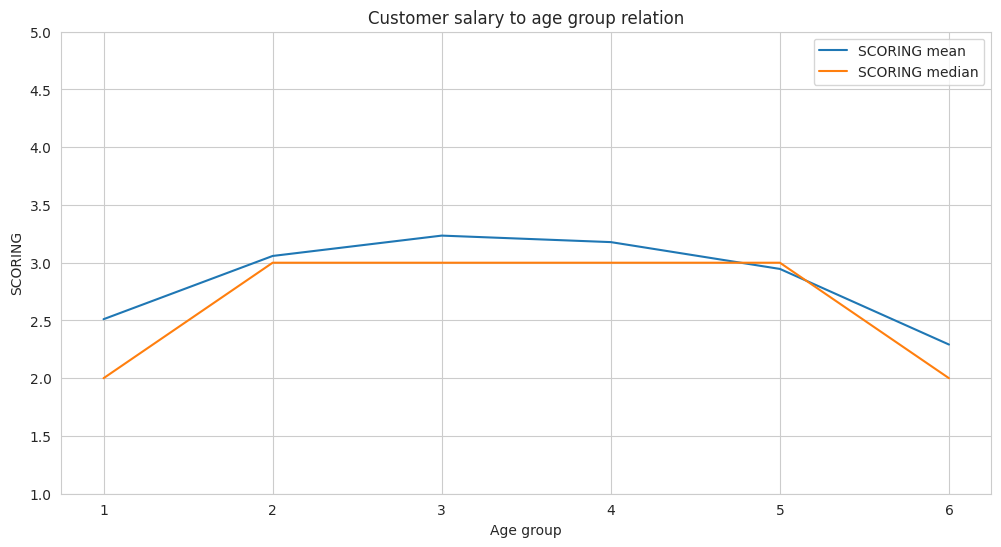

In [ ]:
salary_mean = df.groupby("target")["SCORING"].mean()
salary_median = df.groupby("target")["SCORING"].median()
# print(salary_mean)

plt.figure(figsize=(12, 6))
sns.lineplot(salary_mean, label="SCORING mean")
sns.lineplot(salary_median, label="SCORING median")

plt.title(f'Customer salary to age group relation')
plt.xlabel('Age group')
plt.ylabel('SCORING')
plt.ylim(1, 5)
plt.show()

#### **Conclusion:**
- ##### On average, people from age groups 3 and 4 have the biggest income;
- ##### We also can assume that group 1 corresponds to the young and group 6 corresponds to the eldery (or vice versa).

### **3.2 Relation between incoming messages from banks and age group**
#### **Goal:** Determine the distribution of bank messages amongst age groups.

In [ ]:
banks = df.loc[:, "PRIVAT":"UKRSIB"]
banks["target"] = df["target"]
banks.head()

,PRIVAT,OSCHADBANK,ALFABANK,UKRSOTBANK,OTP,UKRGASBANK,RAIFFEISEN,PIVDENNYI,IDEABANK,SBERBANK,MONOBANK,PRAVEXBANK,UKRSIB,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [ ]:
banks_messages_sum = banks.groupby("target").sum()
banks_messages_sum

,PRIVAT,OSCHADBANK,ALFABANK,UKRSOTBANK,OTP,UKRGASBANK,RAIFFEISEN,PIVDENNYI,IDEABANK,SBERBANK,MONOBANK,PRAVEXBANK,UKRSIB
target,,,,,,,,,,,,,
1,1854.0,313.0,114.0,46.0,15.0,5.0,511.0,0.0,4.0,0.0,62.0,0.0,170.0
2,9482.0,3074.0,2101.0,567.0,1273.0,448.0,3322.0,904.0,58.0,0.0,404.0,0.0,973.0
3,39028.0,17184.0,10663.0,2296.0,7269.0,3970.0,24453.0,896.0,488.0,0.0,874.0,57.0,4808.0
4,60059.0,26725.0,14834.0,3501.0,9316.0,3955.0,33791.0,802.0,1641.0,0.0,969.0,25.0,4710.0
5,51093.0,28870.0,15508.0,2458.0,5364.0,5142.0,18929.0,819.0,983.0,0.0,259.0,87.0,1583.0
6,22009.0,16939.0,3600.0,866.0,660.0,1546.0,4105.0,736.0,606.0,0.0,57.0,2.0,457.0


In [ ]:
banks_messages_sum_T = banks_messages_sum.T.reset_index()
banks_messages_sum_T = banks_messages_sum_T.rename(columns = {"index": "Bank"})
banks_messages_sum_T

target,Bank,1,2,3,4,5,6
0,PRIVAT,1854.0,9482.0,39028.0,60059.0,51093.0,22009.0
1,OSCHADBANK,313.0,3074.0,17184.0,26725.0,28870.0,16939.0
2,ALFABANK,114.0,2101.0,10663.0,14834.0,15508.0,3600.0
3,UKRSOTBANK,46.0,567.0,2296.0,3501.0,2458.0,866.0
4,OTP,15.0,1273.0,7269.0,9316.0,5364.0,660.0
5,UKRGASBANK,5.0,448.0,3970.0,3955.0,5142.0,1546.0
6,RAIFFEISEN,511.0,3322.0,24453.0,33791.0,18929.0,4105.0
7,PIVDENNYI,0.0,904.0,896.0,802.0,819.0,736.0
8,IDEABANK,4.0,58.0,488.0,1641.0,983.0,606.0
9,SBERBANK,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
top_banks = banks_messages_sum.sum(axis=0).sort_values(ascending = False)[:5]
top_banks

PRIVAT        183525.0
OSCHADBANK     93105.0
RAIFFEISEN     85111.0
ALFABANK       46820.0
OTP            23897.0
dtype: float64

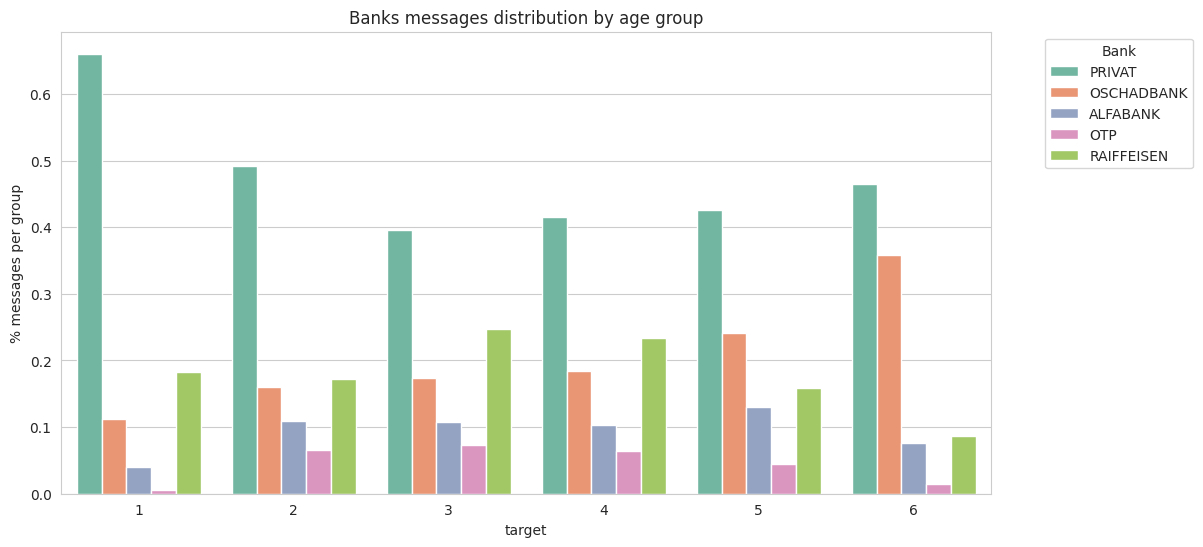

In [ ]:
banks_top_messages_sum_T = banks_messages_sum_T[banks_messages_sum_T['Bank'].isin(top_banks.index)]
banks_melted = pd.melt(banks_top_messages_sum_T, id_vars='Bank', var_name='target', value_name='Subscribers')

banks_melted['Percentage'] = banks_melted.groupby('target')['Subscribers'].transform(lambda x: x / x.sum())
# df_top_cities = df_cleaned[df_cleaned['City_post_HOME'].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.barplot(x='target', y='Percentage', hue='Bank', data=banks_melted, palette='Set2')

plt.title('Banks messages distribution by age group')
plt.xlabel('target')
plt.ylabel('% messages per group')
plt.legend(title='Bank', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
banks_messages_sum_T[banks_messages_sum_T['Bank'].isin(top_banks.index)]

target,Bank,1,2,3,4,5,6
0,PRIVAT,1854.0,9482.0,39028.0,60059.0,51093.0,22009.0
1,OSCHADBANK,313.0,3074.0,17184.0,26725.0,28870.0,16939.0
2,ALFABANK,114.0,2101.0,10663.0,14834.0,15508.0,3600.0
4,OTP,15.0,1273.0,7269.0,9316.0,5364.0,660.0
6,RAIFFEISEN,511.0,3322.0,24453.0,33791.0,18929.0,4105.0


#### **Conclusion:**
- ##### The most popular bank amongst all of the age groups is PrivatBank;
- ##### Oshchad bank gets increasingly more popular with each age group.

### **3.3 Relation between location and age group**
#### **Goal:** Determine the cities with the highest percentage of the given age groups in relation <br>to the total location (city / oblast / district) population.

In [ ]:
non_numeric.head()

,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,device_brand,device_type_rus
0,Одеська,Овідіопольський,Авангард,Одеська,Одеса,Одеса,Samsung,smartphone
1,Одеська,Одеса,Одеса,Одеська,Одеса,Одеса,Blackview,smartphone
2,Дніпропетровська,Дніпро,Дніпро,Дніпропетровська,Дніпро,Дніпро,Samsung,phone
3,Дніпропетровська,Павлоградський,Булахівка,Дніпропетровська,Павлоградський,Межеріч,Nokia,phone
4,Луганська,Хрустальний,Хрустальний,Луганська,Хрустальний,Хрустальний,Alcatel,smartphone


In [ ]:
non_numeric_cleaned = non_numeric.copy(deep=True)
non_numeric_cleaned['target'] = df['target'].astype(int)

def plot_location_to_target(feature):
  """
  Plots the distribution of age groups per location (% of total population)
  The locations are: oblasts, cities and districts (raions)
  """
  # print(non_numeric_cleaned['target'].dtype)
  # print(non_numeric_cleaned['target'].isna().sum())
  # print(non_numeric_cleaned.shape, df.shape)

  # non_numeric_cleaned = non_numeric_cleaned[non_numeric_cleaned[feature] != "no_info"]
  city_counts = non_numeric_cleaned[feature].value_counts()

  # Select the top k locations
  k = 6
  top_cities = city_counts.head(k).index

  # Filter the DataFrame for the top k locations
  df_top_cities = non_numeric_cleaned[non_numeric_cleaned[feature].isin(top_cities)]

  # Calculate and normalize the data for the top k locations
  normalized_data = df_top_cities.groupby([feature, 'target']).size().reset_index(name='Count')
  # display(df_top_cities.groupby([feature, 'target']).size())
  normalized_data['Count'] = normalized_data['Count'] / normalized_data.groupby(feature)['Count'].transform('sum')

  # Create the countplot
  plt.figure(figsize=(12, 6))
  sns.barplot(x='target', y='Count', hue=feature, data=normalized_data, palette='Set2')

  # Set plot properties
  plt.title(f'Top {k} {feature} with the highest % of each age group')
  plt.xlabel('Age group')
  plt.ylabel('% people in the location')

  # Show the plot
  plt.legend(title=feature, loc='upper left')
  plt.show()

In [ ]:
locations = non_numeric.loc[:, 'Oblast_post_HOME':'City_post_WORK']

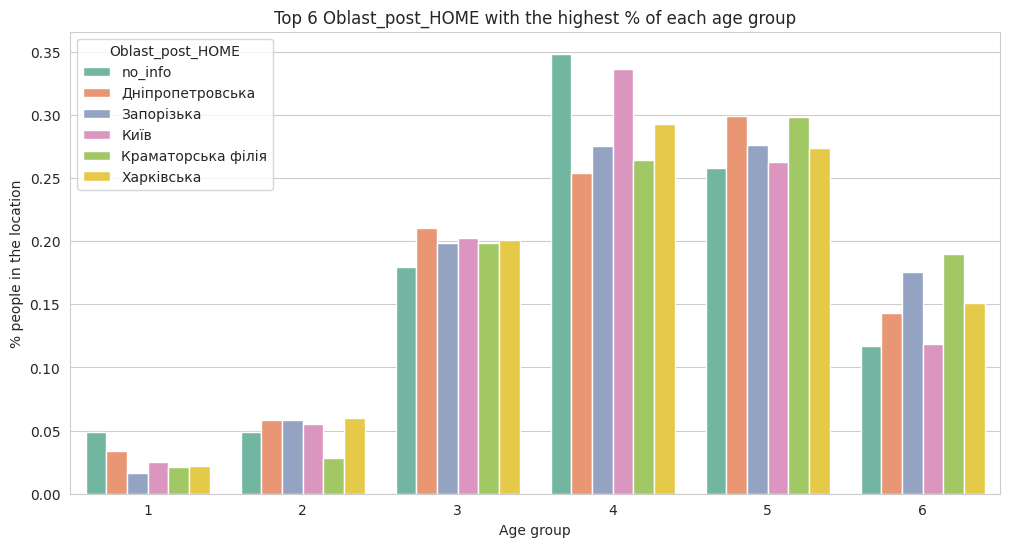

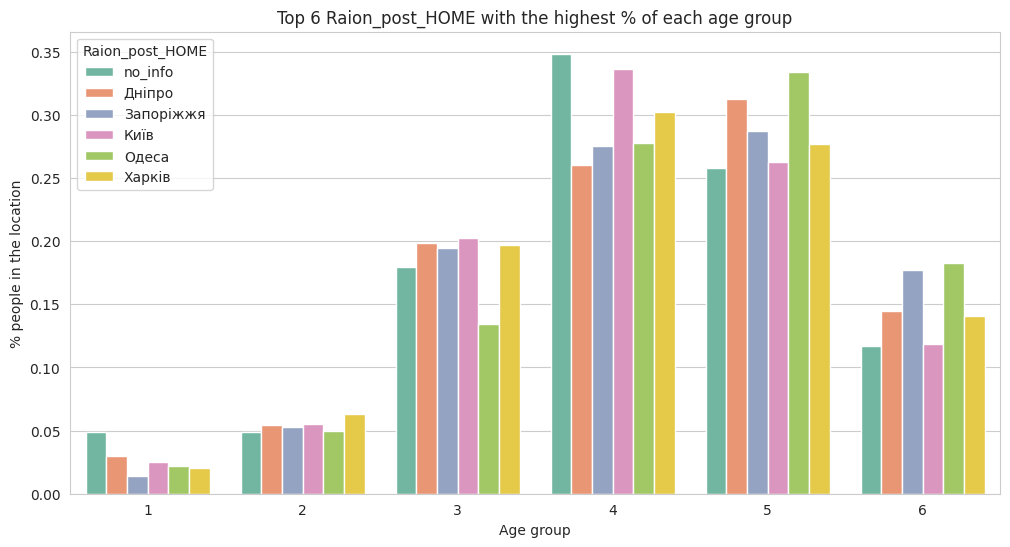

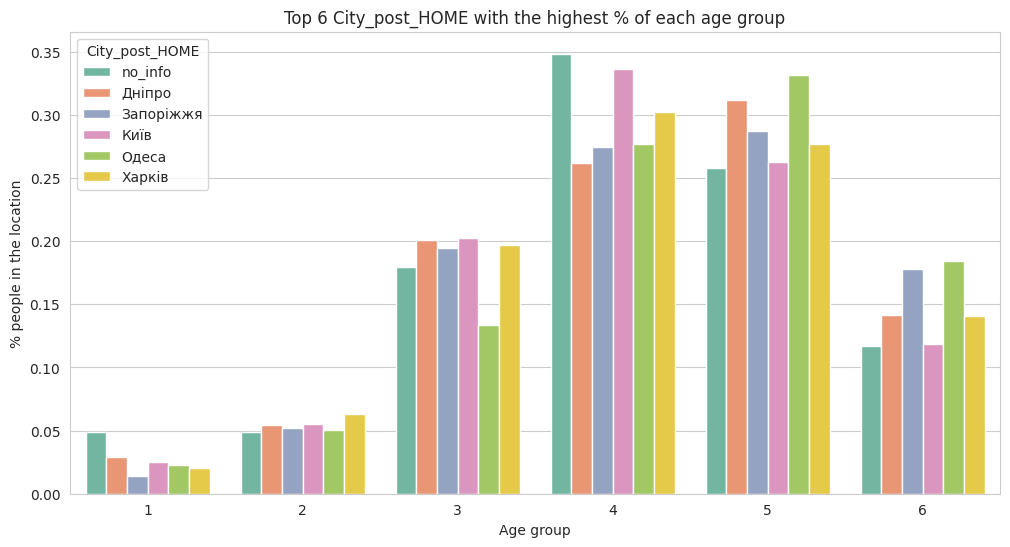

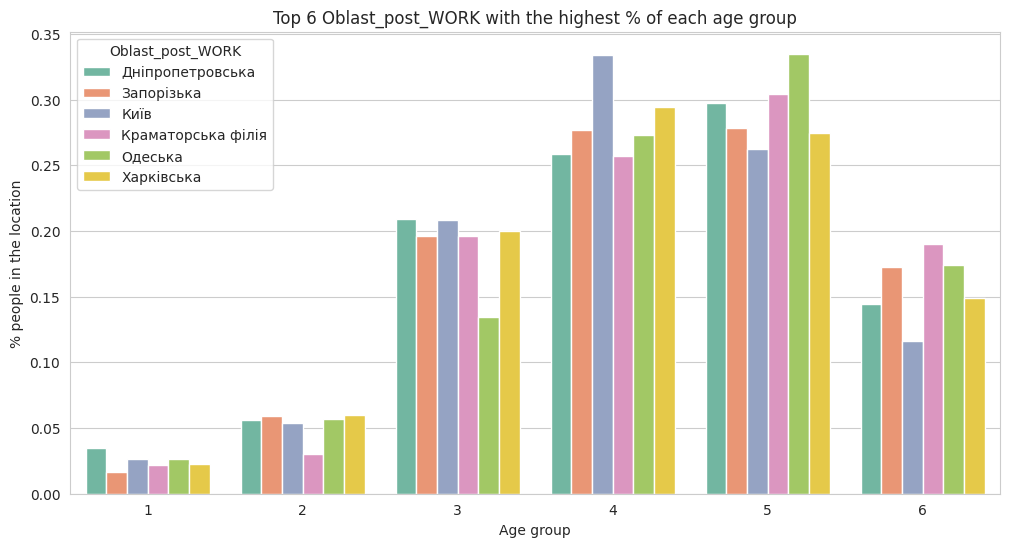

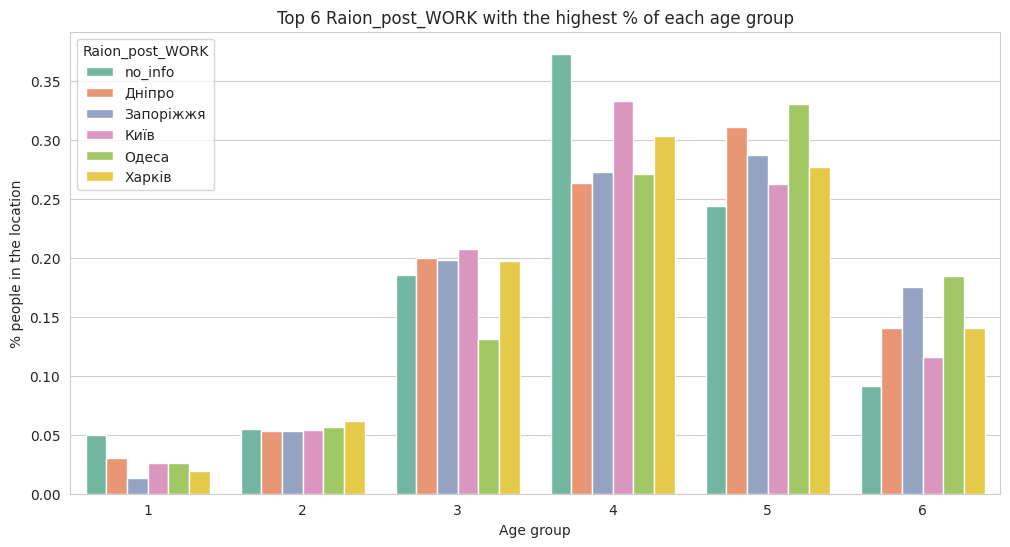

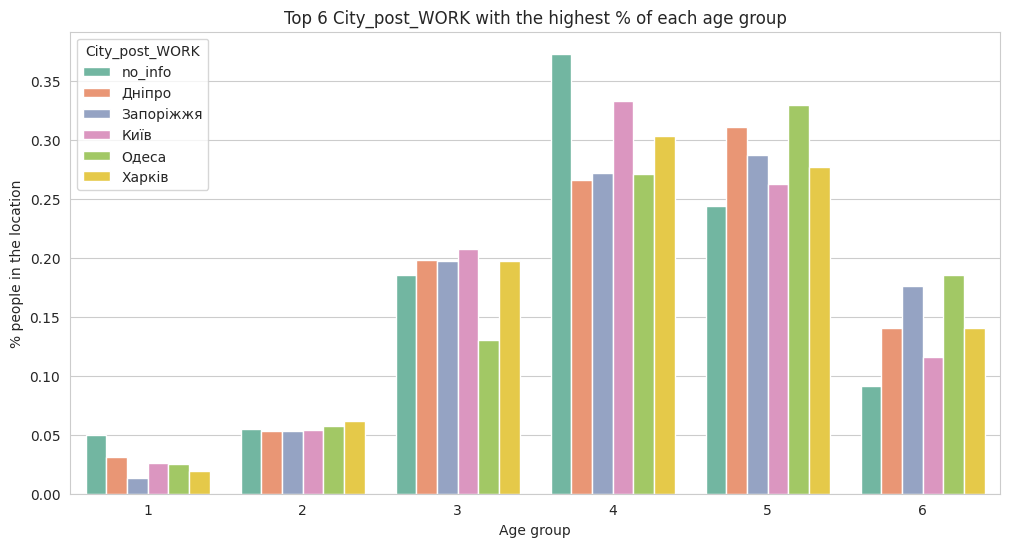

In [ ]:
for feature in locations:
  plot_location_to_target(feature)

#### **Conclusion:**
##### It is easy to see that the distribution of age groups amongst locations is similar, therefore we can drop all columns except Oblast_post_HOME and Oblast_post_WORK. Such approach is also pretty intuitive.

In [ ]:
for feature in locations:
  if feature not in ['Oblast_post_HOME', 'Oblast_post_WORK']:
    df = df.drop(feature, axis=1)
    non_numeric = non_numeric.drop(feature, axis=1)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None,'display.max_colwidth', -1):
  display(df.head())

,CALCULATION_METHOD_ID,calls_count_in_weekdays,calls_duration_in_weekdays,calls_count_out_weekdays,calls_duration_out_weekdays,calls_count_in_weekends,calls_duration_in_weekends,calls_count_out_weekends,calls_duration_out_weekends,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,LAT_HOME,LON_HOME,Oblast_post_HOME,lat_quad_home,lon_quad_home,LAT_WORK,LON_WORK,Oblast_post_WORK,lat_quad_work,lon_quad_work,device_brand,device_type_rus,sim_count,AVG_ARPU,ROUM,phone_value,SCORING,car,gender,lifetime,how_long_same_model,ecommerce_score,PRIVAT,OSCHADBANK,ALFABANK,UKRSOTBANK,OTP,UKRGASBANK,RAIFFEISEN,PIVDENNYI,IDEABANK,SBERBANK,MONOBANK,PRAVEXBANK,UKRSIB,banks_sms_count,SHELL,OKKO,SUNOIL,KLO,BRSM,AMIC,TNK,UPG,gas_stations_sms,fb_volume,fb_count,instagram_volume,instagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,dropbox_volume,dropbox_count,uber_volume,uber_count,steam_volume,steam_count,whatsapp_volume,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,twitch_volume,twitch_count,tumblr_volume,tumblr_count,flickr_volume,flickr_count,badoo_volume,badoo_count,tinder_volume,tinder_count,netflix_volume,netflix_count,applemaps_volume,applemaps_count,msoffice365_volume,msoffice365_count,jabber_volume,jabber_count,telegram_volume,telegram_count,target,unpopular_os_vendors,software_os_vendor_Google,software_os_vendor_no_info,software_os_vendor_Apple,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_vendor_Microsoft
0,2,10.87,32.025,17.74,40.819,7.00,21.463,11.13,20.427,154.837,181.143,46.439609,30.639673,Одеська,46.438235,30.641922,46.444676,30.657115,Одеська,46.442733,30.655670,Samsung,smartphone,2.0,260.739450,0.0,3.0,4,1,0,38.700000,25.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6714,492.55,0.3104,2.42,2.2472,97.26,17.6650,208.84,11.6511,479.45,0.5341,60.84,0.1087,13.71,1.1130,12.26,0.0,0.0,0.0,0.0,0.0012,0.03,5.12,82.42,0.1076,0.26,0.0,0.0,0.0009,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,9.29,0.0000,0.0,0.0,0.0,4,0,1,0,0,0,0,0
1,1,0.91,1.346,0.48,0.546,0.25,0.688,0.75,0.708,53.639,49.009,46.535878,30.728390,Одеська,46.537188,30.729834,46.406118,30.715685,Одеська,46.406747,30.714810,Blackview,smartphone,2.0,52.635025,0.0,3.0,2,1,0,159.533333,10.0,0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0795,17.03,0.0000,0.00,0.1209,14.81,1.9411,13.13,2.6901,112.48,0.0085,0.68,0.0000,0.00,0.0021,0.10,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0033,0.1,0.0,0.0,4,0,1,0,0,0,0,0
2,2,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.000,48.456286,35.059533,Дніпропетровська,48.457353,35.060106,48.456286,35.059533,Дніпропетровська,48.457353,35.060106,Samsung,phone,2.0,22.189575,0.0,4.0,1,0,1,177.900000,25.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,0.0,6,0,0,1,0,0,0,0
3,2,7.39,30.278,11.00,44.182,5.00,20.008,8.38,32.385,0.000,0.000,48.600532,35.668434,Дніпропетровська,48.601219,35.667443,48.557956,35.766095,Дніпропетровська,48.560749,35.764687,Nokia,phone,2.0,41.816525,0.0,4.0,1,0,1,85.633333,25.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.00,0.0000,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,0.0,5,0,0,0,0,1,0,0
4,1,0.43,0.996,0

### **3.4 Correlation between target and features**
#### **Note:** let's set precision parameter *alpha* = 0.05

In [ ]:
from scipy.stats import spearmanr

In [ ]:
alpha = 0.05

In [ ]:
numeric_ = numeric.drop(["CALCULATION_METHOD_ID", "target"], axis=1)
target = df['target']

correlation_results = pd.DataFrame(columns=['Feature', 'Correlation_with_target', 'P-Value'])

for feature in numeric_.columns:
    correlation, p_value = spearmanr(numeric_[feature], target)
    correlation_results.loc[len(correlation_results.index)] = [feature, correlation, p_value]
    #correlation_results = correlation_results.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)

correlation_results = correlation_results.sort_values("Correlation_with_target", key=abs, ascending=False)
correlation_results = correlation_results.set_index("Feature")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


#### Top-5 biggest spearman correlation coeffs by absolute value

In [ ]:
correlation_results.head()

,Correlation_with_target,P-Value
Feature,,
instagram_volume,-0.390770,0.0
instagram_count,-0.385094,0.0
DATA_VOLUME_WEEKDAYS,-0.375579,0.0
DATA_VOLUME_WEEKENDS,-0.357999,0.0
fb_count,-0.351374,0.0


#### Top-5 smallest spearman correlation coeffs by absolute value

In [ ]:
correlation_results.iloc[-5:]

,Correlation_with_target,P-Value
Feature,,
AMIC,0.001733,0.801786
software_os_vendor_Microsoft,-0.001577,0.819258
banks_sms_count,-0.001093,0.874222
UKRSOTBANK,0.000622,0.928151
SBERBANK,NaN,NaN


In [ ]:
numeric_["SBERBANK"].sum()

0.0

#### **Conclusion**
##### We can drop column "SBERBANK", as it is all-zero.

In [ ]:
df = df.drop("SBERBANK", axis=1)

#### **Let's drop all the features, whose correlation with target is not statistically significant <br> (p-value > 0.05)**

In [ ]:
insignificant_features = correlation_results[correlation_results["P-Value"] > alpha].index
insignificant_features

Index(['PIVDENNYI', 'TNK', 'BRSM', 'UKRGASBANK', 'KLO', 'SUNOIL', 'SHELL',
       'gas_stations_sms', 'UPG', 'IDEABANK', 'calls_duration_in_weekends',
       'OKKO', 'PRAVEXBANK', 'AMIC', 'software_os_vendor_Microsoft',
       'banks_sms_count', 'UKRSOTBANK'],
      dtype='object', name='Feature')

In [ ]:
df.shape

(20996, 113)

In [ ]:
df = df.drop(insignificant_features, axis=1)

In [ ]:
df.shape

(20996, 96)

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None,'display.max_colwidth', -1):
#     display(df.head())

### **3.5 Relation between gender and target**

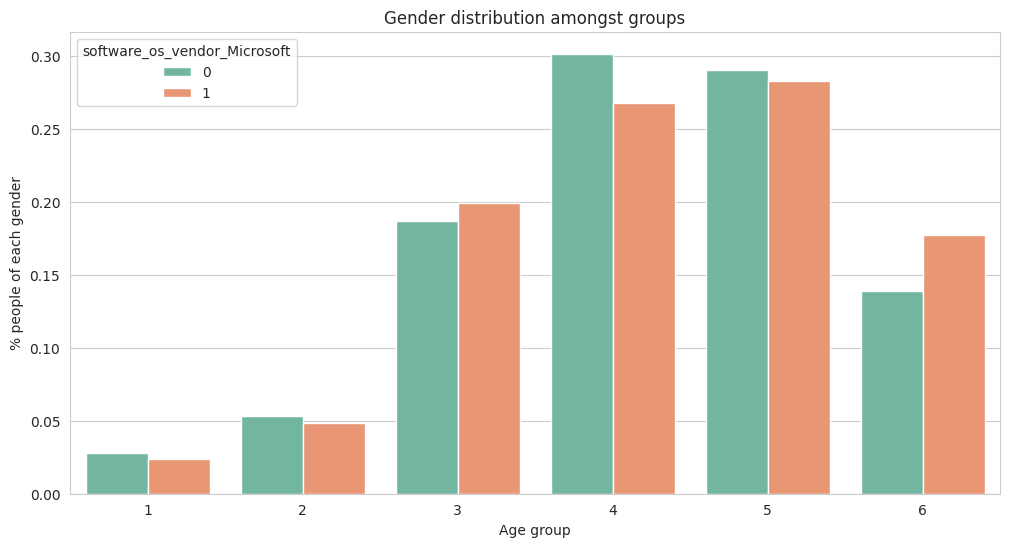

In [ ]:
gender_by_group = df["gender"].value_counts()
gender_by_group

normalized_data = df.groupby(['gender', 'target']).size().reset_index(name='Count')
normalized_data['Count'] = normalized_data['Count'] / normalized_data.groupby('gender')['Count'].transform('sum')
# normalized_data

# Create the countplot
plt.figure(figsize=(12, 6))
sns.barplot(x='target', y='Count', hue='gender', data=normalized_data, palette='Set2')

# Set plot properties
plt.title(f'Gender distribution amongst groups')
plt.xlabel('Age group')
plt.ylabel('% people of each gender')

# Show the plot
plt.legend(title=feature, loc='upper left')
plt.show()

### **Conclusion:**
#### Genders are almost equally distributed amongst age groups.

### **3.6 Relation between user lifetime and target**

In [ ]:
target_to_lifetime = df.groupby("target")["lifetime"].mean().sort_values(ascending=False)
target_to_lifetime

target
5    127.763305
4    121.525047
6    117.297672
3     99.270712
2     60.036648
1     51.435280
Name: lifetime, dtype: float64

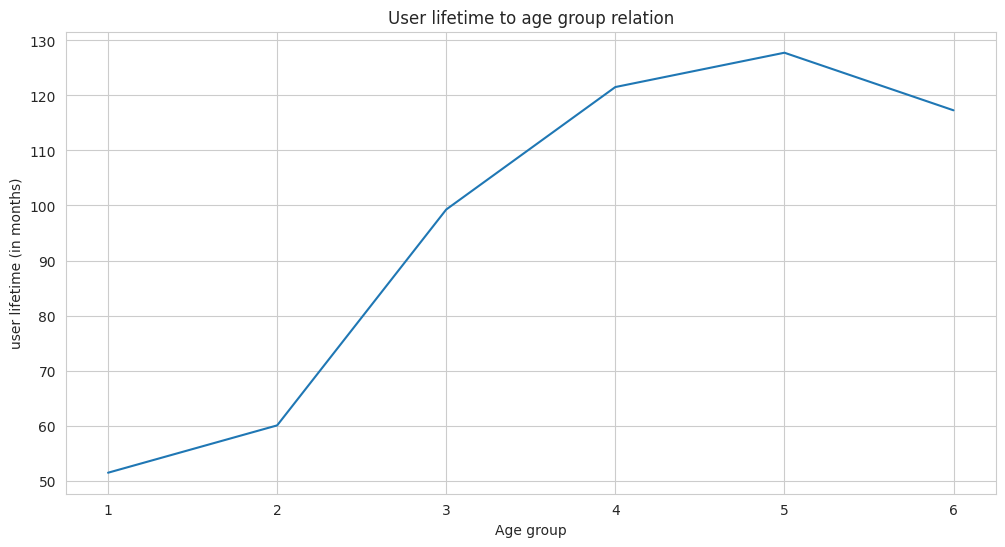

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(target_to_lifetime)

plt.title(f'User lifetime to age group relation')
plt.xlabel('Age group')
plt.ylabel('user lifetime (in months)')
plt.show()

### **Conclusion:**
#### Now there is even more evidence, that age groups are sorted from the youngest (1) to the oldest (6) people. <br> It is reasonable to assume that younger users tend to have less user lifetime.



---


# **4. Data preprocessing**

## **4.1 One-hot encoding**

#### We need to one-hot this column as we don't know which value corresponds to which calculation method

In [ ]:
df["CALCULATION_METHOD_ID"].value_counts()

2    10585
1    10411
Name: CALCULATION_METHOD_ID, dtype: int64

In [ ]:
non_numeric_columns = non_numeric.columns
non_numeric_columns

Index(['Oblast_post_HOME', 'Oblast_post_WORK', 'device_brand',
       'device_type_rus'],
      dtype='object')

In [ ]:
to_one_hot = non_numeric_columns.tolist()
to_one_hot.append("CALCULATION_METHOD_ID")
print(to_one_hot)

['Oblast_post_HOME', 'Oblast_post_WORK', 'device_brand', 'device_type_rus', 'CALCULATION_METHOD_ID']


In [ ]:
df_onehotted = pd.get_dummies(df, columns=to_one_hot)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None,'display.max_colwidth', -1):
    display(df_onehotted.head())

,calls_count_in_weekdays,calls_duration_in_weekdays,calls_count_out_weekdays,calls_duration_out_weekdays,calls_count_in_weekends,calls_count_out_weekends,calls_duration_out_weekends,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,LAT_HOME,LON_HOME,lat_quad_home,lon_quad_home,LAT_WORK,LON_WORK,lat_quad_work,lon_quad_work,sim_count,AVG_ARPU,ROUM,phone_value,SCORING,car,gender,lifetime,how_long_same_model,ecommerce_score,PRIVAT,OSCHADBANK,ALFABANK,OTP,RAIFFEISEN,MONOBANK,UKRSIB,fb_volume,fb_count,instagram_volume,instagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,dropbox_volume,dropbox_count,uber_volume,uber_count,steam_volume,steam_count,whatsapp_volume,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,twitch_volume,twitch_count,tumblr_volume,tumblr_count,flickr_volume,flickr_count,badoo_volume,badoo_count,tinder_volume,tinder_count,netflix_volume,netflix_count,applemaps_volume,applemaps_count,msoffice365_volume,msoffice365_count,jabber_volume,jabber_count,telegram_volume,telegram_count,target,unpopular_os_vendors,software_os_vendor_Google,software_os_vendor_no_info,software_os_vendor_Apple,software_os_vendor_Nokia,software_os_vendor_Samsung,Oblast_post_HOME_no_info,Oblast_post_HOME_Івано-Франківська,Oblast_post_HOME_Волинська,Oblast_post_HOME_Вінницька,Oblast_post_HOME_Дніпропетровська,Oblast_post_HOME_Донецька,Oblast_post_HOME_Житомирська,Oblast_post_HOME_Закарпатська,Oblast_post_HOME_Запорізька,Oblast_post_HOME_Київ,Oblast_post_HOME_Київська,Oblast_post_HOME_Краматорська філія,Oblast_post_HOME_Криворізька філія,Oblast_post_HOME_Кіровоградська,Oblast_post_HOME_Луганська,Oblast_post_HOME_Львівська,Oblast_post_HOME_Миколаївська,Oblast_post_HOME_Одеська,Oblast_post_HOME_Полтавська,Oblast_post_HOME_Рівненська,Oblast_post_HOME_Сумська,Oblast_post_HOME_Сєвєродонецька філія,Oblast_post_HOME_Тернопільська,Oblast_post_HOME_Харківська,Oblast_post_HOME_Херсонська,Oblast_post_HOME_Хмельницька,Oblast_post_HOME_Черкаська,Oblast_post_HOME_Чернівецька,Oblast_post_HOME_Чернігівська,Oblast_post_WORK_no_info,Oblast_post_WORK_Івано-Франківська,Oblast_post_WORK_Волинська,Oblast_post_WORK_Вінницька,Oblast_post_WORK_Дніпропетровська,Oblast_post_WORK_Донецька,Oblast_post_WORK_Житомирська,Oblast_post_WORK_Закарпатська,Oblast_post_WORK_Запорізька,Oblast_post_WORK_Київ,Oblast_post_WORK_Київська,Oblast_post_WORK_Краматорська філія,Oblast_post_WORK_Криворізька філія,Oblast_post_WORK_Кіровоградська,Oblast_post_WORK_Луганська,Oblast_post_WORK_Львівська,Oblast_post_WORK_Миколаївська,Oblast_post_WORK_Одеська,Oblast_post_WORK_Полтавська,Oblast_post_WORK_Рівненська,Oblast_post_WORK_Сумська,Oblast_post_WORK_Сєвєродонецька філія,Oblast_post_WORK_Тернопільська,Oblast_post_WORK_Харківська,Oblast_post_WORK_Херсонська,Oblast_post_WORK_Хмельницька,Oblast_post_WORK_Черкаська,Oblast_post_WORK_Чернівецька,Oblast_post_WORK_Чернігівська,device_brand_Acer,device_brand_Acquisitions,device_brand_Alcatel,device_brand_Anycool,device_brand_Aoc,device_brand_Apple,device_brand_Archos,device_brand_Arima,device_brand_Ark,device_brand_Asus,device_brand_BLU,device_brand_BQ Devices,device_brand_BenQ-Siemens,device_brand_Bilisim Teknolojiler,device_brand_Bird,device_brand_BlackBerry,device_brand_Blackview,device_brand_Bluebo,device_brand_Boway,device_brand_Buckingham,device_brand_CAT,device_brand_CK,device_brand_Chengyu Media,device_brand_Chenle,device_brand_China Mobile,device_brand_Compal,device_brand_Connect,device_brand_CoolPAD,device_brand_Crave,device_brand_Cubot,device_brand_DF Plus,device_brand_Darago,device_brand_Daxian,device_brand_Dexp,device_brand_Digicom,device_brand_Donod,device_brand_DooGee,device_brand_E-mobile,device_brand_Easiecom,device_brand_Elephone,device_brand_Enjoy,device_brand_Enjoy Group,device_brand_Erkayasan,device_brand_Fibocom,device_brand_Fly,device_brand_Flying Technology,device_brand_

In [ ]:
df_onehotted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 20999
Columns: 336 entries, calls_count_in_weekdays to CALCULATION_METHOD_ID_2
dtypes: float64(80), int64(11), uint8(245)
memory usage: 19.6 MB


## **4.2 Train / Validation split. Standardizing the data**

#### **Splitting data into train and validation sets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_onehotted.drop("target", axis=1)
y = df_onehotted["target"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

#### **Standardizing data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

## **4.3 Principal Component Analysis (PCA)**
### **Goal:** We need to reduce dimensionality of the given dataset to focus on the most important features for ML models.

### **Finding optimal number of principal components**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [ ]:
optimal_component_number = pca.n_components_
print(f"Optimal n_components: {optimal_component_number}")

Optimal n_components: 227


In [ ]:
number_of_components = np.arange(1, X_train.shape[1], 20)
print(number_of_components)

[  1  21  41  61  81 101 121 141 161 181 201 221 241 261 281 301 321]


In [ ]:
variance_ratio = []
for num in number_of_components:
  pca = PCA(n_components=num)
  pca.fit(X_train)
  variance_ratio.append(np.sum(pca.explained_variance_ratio_))
  # print(pca.explained_variance_ratio_)

In [ ]:
components_to_variance = pd.DataFrame(list(zip(number_of_components, variance_ratio)),
                                      columns =['n_components', 'var_ratio'])

In [ ]:
# components_to_variance.to_csv('/content/drive/MyDrive/ML/ML Final Project/components_to_variance_v3.csv', index=True)

In [ ]:
# components_to_variance = pd.read_csv('/content/drive/MyDrive/ML/ML Final Project/components_to_variance_v3.csv')

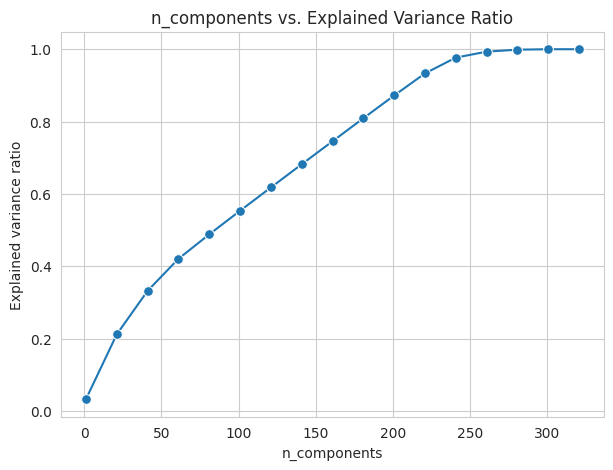

In [ ]:
sns.lineplot(data=components_to_variance, x='n_components', y='var_ratio', marker='o', markersize=7)
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.show()

#### **Conclusion:**
#### We can set the number of components equal to *optimal_component_number*, as it is optimal for ML model speed to accuracy ratio.

### **Reducing dimensions of the original dataset**

In [ ]:
print("Original X_train shape:   ", X_train.shape)
print("Original X_valid shape:   ", X_valid.shape)

Original X_train shape:    (15747, 335)
Original X_valid shape:    (5249, 335)


In [ ]:
pca = PCA(n_components=optimal_component_number)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_valid = pca.transform(X_valid)

In [ ]:
print("Transformed X_train shape:", X_train.shape)
print("Transformed X_valid shape:", X_valid.shape)

Transformed X_train shape: (15747, 227)
Transformed X_valid shape: (5249, 227)




---


# **5. Model training**

### **Sklearn imports**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

### **Useful functions**

In [ ]:
def print_results(y_true, y_pred):
    """
    Prints model prediction accuracy results using different metrics
    """
    print('F1-score:', f1_score(y_true, y_pred, average='weighted').round(5))
    print('Accuracy-score:', accuracy_score(y_true, y_pred).round(5))

In [ ]:
def plot_validation_curve(model_grid, param_name, params=None):
    """
    Plots validation curves
    On х axis --- hyperparameters (param_***)
    On y axis --- metrics (mean_test_score)
    """

    # results_df = pd.DataFrame(model_grid.cv_results_)
    results_df = model_grid
    # score_results[["param_"+param, 'mean_test_score']].groupby("param_"+param).max()
    if params == None:
        # plt.plot(results_df['param_'+param_name], results_df['mean_test_score'])
        plt.plot(results_df[["param_"+param_name, 'mean_test_score']].groupby("param_"+param_name).max())
    else:
        plt.plot(params, results_df['mean_test_score'])

    # Підписуємо осі і графік
    plt.xlabel(param_name)
    plt.ylabel('Test F1 score')
    plt.title('Validation curve')
    plt.show()

## **5.1 Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### **Hyperpatameter tuning**

In [ ]:
# tree_params = {'max_depth': np.arange(2, 11),
#                'min_samples_split': np.arange(2, 15),
#                "max_features": np.arange(10, 221, 50)}

# tree = DecisionTreeClassifier(random_state=42)
# tree_grid = RandomizedSearchCV(tree, tree_params,
#                          cv=5, scoring='accuracy', n_jobs=-1)

# tree_grid.fit(X_train, y_train)

In [ ]:
# score_results_tree = pd.DataFrame(tree_grid.cv_results_)
score_results_tree = pd.read_csv('/content/drive/MyDrive/ML/ML Final Project/tree_grid_v3.csv')

In [ ]:
# score_results_tree.to_csv("/content/drive/MyDrive/ML/ML Final Project/tree_grid_v3.csv", index=True)

In [ ]:
# best_params_tree = tree_grid.best_params_
# best_score_tree = tree_grid.best_score_

best_params_tree = {'n_estimators': 30,
                  'min_samples_split': 6,
                  'max_features': 160,
                  'max_depth': 4}
best_score_tree = 0.35822702092375003

In [ ]:
print('Best hyperparameters:', best_params_tree)
print('Best score:', best_score_tree)

Best hyperparameters: {'n_estimators': 30, 'min_samples_split': 6, 'max_features': 160, 'max_depth': 4}
Best score: 0.35822702092375003


#### **Best model validation**

In [ ]:
# tree_best = tree_grid.best_estimator_

tree_best = DecisionTreeClassifier(min_samples_split=5,
                                   max_features=200,
                                   max_depth=9,
                                   random_state=42)
tree_best.fit(X_train, y_train)

y_pred_tree = tree_best.predict(X_valid)
print_results(y_valid, y_pred_tree)

F1-score: 0.33472
Accuracy-score: 0.33911


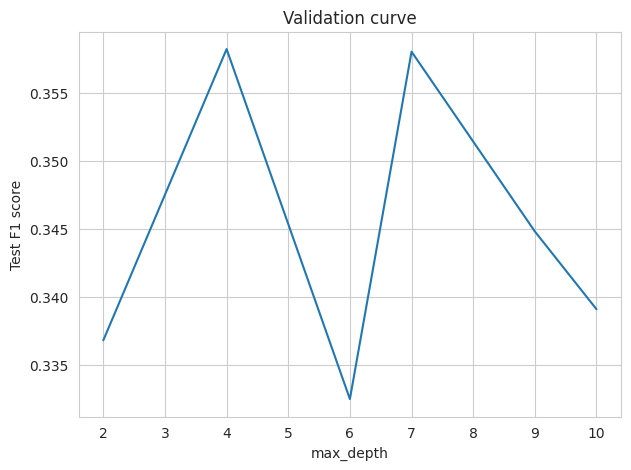

In [ ]:
plot_validation_curve(score_results_tree, "max_depth")

## **5.2 Ensembles**

### **a. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### **Hyperpatameter tuning**

In [ ]:
# rf_params = {'n_estimators': np.arange(20, 40, 10),
#              'max_depth': np.arange(3, 10),
#              'max_features': np.arange(100, 201, 50),
#              'min_samples_split': np.arange(2, 7)}

# rf = RandomForestClassifier(random_state=42)
# rf_grid = RandomizedSearchCV(rf, rf_params,
#                          cv=5, scoring='f1_weighted', n_jobs=-1)
# rf_grid.fit(X_train, y_train)

In [ ]:
# score_results_rf = pd.DataFrame(rf_grid.cv_results_)
score_results_rf = pd.read_csv('/content/drive/MyDrive/ML/ML Final Project/rf_grid_v3.csv')

In [ ]:
# score_results_rf.to_csv('/content/drive/MyDrive/ML/ML Final Project/rf_grid_v3.csv', index=True)

In [ ]:
# best_params_rf = rf_grid.best_params_
# best_score_rf = rf_grid.best_score_

best_params_rf = {'n_estimators': 30,
                  'min_samples_split': 5,
                  'max_features': 200,
                  'max_depth': 9}
best_score_rf = 0.3720630463972894

In [ ]:
print('Best hyperparameters:', best_params_rf)
print('Best score:', best_score_rf)

Best hyperparameters: {'n_estimators': 30, 'min_samples_split': 5, 'max_features': 200, 'max_depth': 9}
Best score: 0.3720630463972894


#### **Best model validation**

In [ ]:
# rf_best = rf_grid.best_estimator_

rf_best = RandomForestClassifier(n_estimators=30,
                                 min_samples_split=5,
                                 max_features=200,
                                 max_depth=9,
                                 random_state=42)
rf_best.fit(X_train, y_train)

y_pred_rf = rf_best.predict(X_valid)
print_results(y_valid, y_pred_rf)

F1-score: 0.36734
Accuracy-score: 0.37702


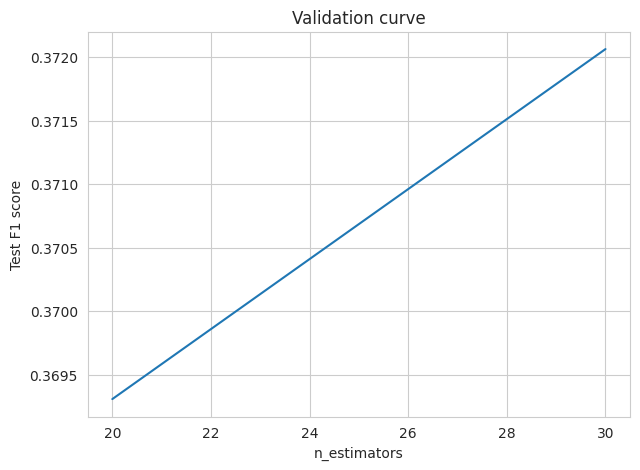

In [ ]:
plot_validation_curve(score_results_rf, "n_estimators")

### **b. Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#### **Hyperpatameter tuning**

In [ ]:
# gb_params = {'n_estimators': np.arange(20, 41, 10)}

# gb = GradientBoostingClassifier(random_state=42)
# gb_grid = RandomizedSearchCV(gb, gb_params, cv=5, scoring='f1_weighted', n_jobs=-1)
# gb_grid.fit(X_train, y_train)

In [ ]:
# score_results_gb = pd.DataFrame(gb_grid.cv_results_)
score_results_gb = pd.read_csv('/content/drive/MyDrive/ML/ML Final Project/gb_grid_v3.csv')

In [ ]:
# score_results_gb.to_csv('/content/drive/MyDrive/ML/ML Final Project/gb_grid_v3.csv', index=True)

In [ ]:
# best_params_gb = gb_grid.best_params_
# best_score_gb = gb_grid.best_score_

best_params_gb = {'n_estimators': 40}
best_score_gb = 0.37972443258517824

In [ ]:
print('Best hyperparameters:', best_params_gb)
print('Best score:', best_score_gb)

Best hyperparameters: {'n_estimators': 40}
Best score: 0.37972443258517824


In [ ]:
# gb_best = gb_grid.best_estimator_

gb_best = GradientBoostingClassifier(n_estimators=40, random_state=42)
gb_best.fit(X_train, y_train)

y_pred_gb = gb_best.predict(X_valid)
print_results(y_valid, y_pred_gb)

F1-score: 0.37645
Accuracy-score: 0.38464


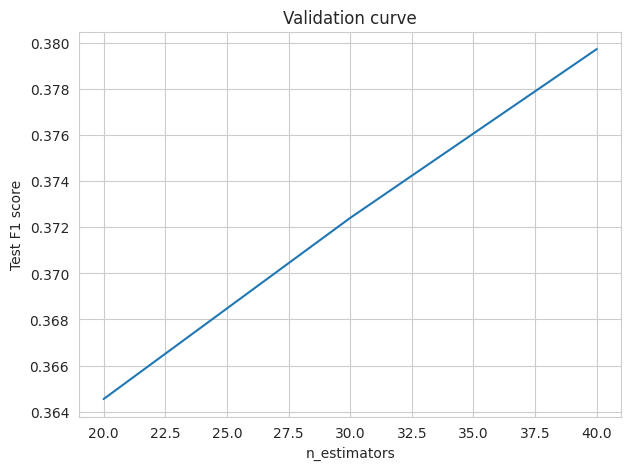

In [ ]:
plot_validation_curve(score_results_gb, "n_estimators")

## **5.3 Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#### **Hyperpatameter tuning**

In [ ]:
# estimators = {"n_estimators": [10, 20, 30, 40, 50, 75, 100, 150]}

# bagging_knn = BaggingClassifier(KNeighborsClassifier(), random_state=42)
# knn_grid = RandomizedSearchCV(bagging_knn, estimators, cv=5, scoring="f1_weighted", n_jobs=-1)
# knn_grid.fit(X_train, y_train)

In [ ]:
# best_params_knn = knn_grid.best_params_
# best_score_knn = knn_grid.best_score_

best_params_knn = {'n_estimators': 150}
best_score_knn = 0.34578

In [ ]:
print('Best hyperparameters:', best_params_knn)
print('Best score:', best_score_knn)

Best hyperparameters: {'n_estimators': 150}
Best score: 0.34578


In [ ]:
# score_results_knn = pd.DataFrame(knn_grid.cv_results_)
score_results_knn = pd.read_csv('/content/drive/MyDrive/ML/ML Final Project/knn_grid_v3.csv')

In [ ]:
# score_results_knn.to_csv("/content/drive/MyDrive/ML/ML Final Project/logreg_grid_v3.csv", index=True)

#### **Best model validation**

In [ ]:
# knn_best = knn_grid.best_estimator_

knn_best = BaggingClassifier(KNeighborsClassifier(),
                             n_estimators=150,
                             random_state=42)
knn_best.fit(X_train, y_train)

y_pred_knn = knn_best.predict(X_valid)
print_results(y_valid, y_pred_knn)

F1-score: 0.32881
Accuracy-score: 0.33359


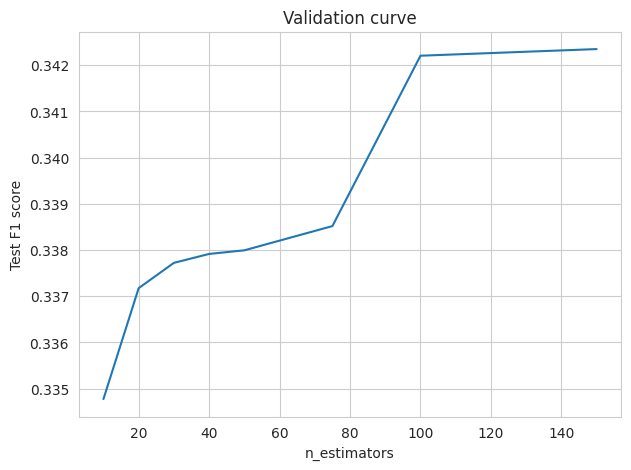

In [ ]:
plot_validation_curve(score_results_knn, "n_estimators")

## **5.4 Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#### **Hyperpatameter tuning**

In [ ]:
log_reg_elnet = LogisticRegression(solver="saga", penalty="elasticnet", l1_ratio=0.5)
C_values = {'C': np.logspace(-3, 3, 10)}

logreg_grid = RandomizedSearchCV(log_reg_elnet, C_values, cv=5, scoring='f1_weighted')
logreg_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(l1_ratio=0.5,
                                                penalty='elasticnet',
                                                solver='saga'),
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
                   scoring='f1_weighted')

In [ ]:
best_params_logreg = logreg_grid.best_params_
best_score_logreg = logreg_grid.best_score_

In [ ]:
print('Best hyperparameters:', best_params_logreg)
print('Best score:', best_score_logreg)

Best hyperparameters: {'C': 0.1}
Best score: 0.4000084352803802


In [ ]:
score_results_logreg = pd.DataFrame(logreg_grid.cv_results_)
# score_results_logreg = pd.read_csv('/content/drive/MyDrive/ML/ML Final Project/logreg_grid_v3.csv')

In [ ]:
score_results_logreg.to_csv("/content/drive/MyDrive/ML/ML Final Project/logreg_grid_v3.csv", index=True)

#### **Best model validation**

In [ ]:
logreg_best = logreg_grid.best_estimator_


# logreg_best.fit(X_train, y_train)

y_pred_logreg = logreg_best.predict(X_valid)
print_results(y_valid, y_pred_logreg)

F1-score: 0.39507
Accuracy-score: 0.39989


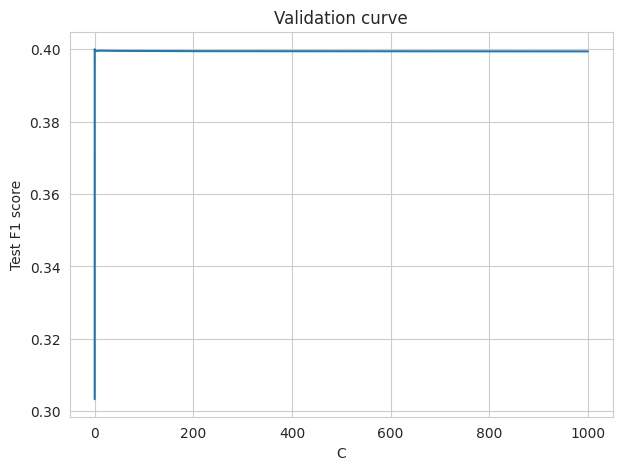

In [ ]:
plot_validation_curve(score_results_logreg, "C")

In [ ]:
# logreg_best_v4 = LogisticRegression(solver="saga", penalty="elasticnet", l1_ratio=0.5, C=46.415888)
# logreg_best_v4.fit(X_train, y_train)

In [ ]:
# y_pred_logreg_v4 = logreg_best_v4.predict(X_valid)
# print_results(y_valid, y_pred_logreg_v4)

## **5.5 Multilayer perceptron (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier

#### **Hyperpatameter tuning**

In [ ]:
# layers = [(300, 150, 100), (300, 150), (200,), (100,), (100, 75, 50), (100, 50)]
# params = {'hidden_layer_sizes': layers,
#           'learning_rate': ['constant', 'invscaling', 'adaptive']}

# mlp = MLPClassifier(solver='adam', activation='logistic', random_state=42)
# mlp_grid = RandomizedSearchCV(mlp, params, cv=5, scoring='f1_weighted', n_jobs=-1)
# mlp_grid.fit(X_train, y_train)

In [ ]:
# score_results_mlp = pd.DataFrame(mlp_grid.cv_results_)
score_results_mlp = pd.read_csv('/content/drive/MyDrive/ML/ML Final Project/mlp_grid_v3.csv')

In [ ]:
# score_results_mlp.to_csv("/content/drive/MyDrive/ML/ML Final Project/mlp_grid_v3.csv", index=True)

In [ ]:
# best_params_mlp = mlp_grid.best_params_
# best_score_mlp = mlp_grid.best_score_

In [ ]:
# print('Best hyperparameters:', best_params_mlp)
# print('Best score:', best_score_mlp)

#### **Best model validation**

In [ ]:
# mlp_best = mlp_grid.best_estimator_

mlp_best = MLPClassifier(solver='adam',
                         activation='logistic',
                         hidden_layer_sizes=(100,),
                         learning_rate='constant',
                         random_state=42)
mlp_best.fit(X_train, y_train)

y_pred_mlp = mlp_best.predict(X_valid)
print_results(y_valid, y_pred_mlp)

F1-score: 0.36512
Accuracy-score: 0.36616


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


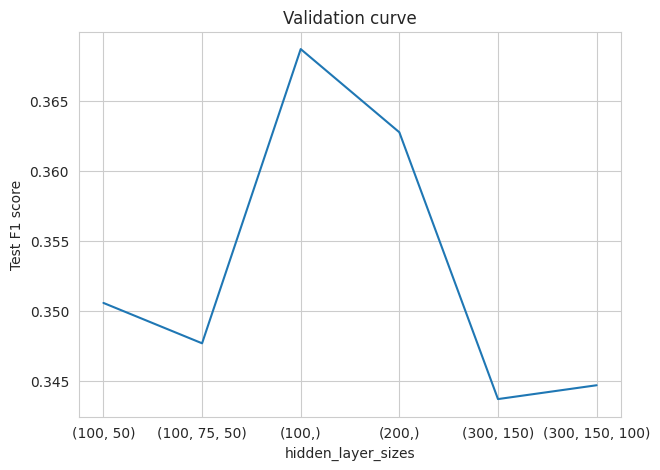

In [ ]:
plot_validation_curve(score_results_mlp, "hidden_layer_sizes")